In [22]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import joblib

# Load dataset
df = pd.read_csv("predictive_maintenance_dataset.csv", parse_dates=["date"])  # Replace with actual dataset path




In [14]:
df

date    device  failure    metric1  metric2  metric3  metric4  \
0     2015-01-01  S1F01085        0  215630672       55        0       52   
1     2015-01-01  S1F0166B        0   61370680        0        3        0   
2     2015-01-01  S1F01E6Y        0  173295968        0        0        0   
3     2015-01-01  S1F01JE0        0   79694024        0        0        0   
4     2015-01-01  S1F01R2B        0  135970480        0        0        0   
...          ...       ...      ...        ...      ...      ...      ...   
19907 2015-01-24  Z1F0AHAT        0   34273496        0        0        6   
19908 2015-01-24  Z1F0AM4J        0  133296640        0        0        0   
19909 2015-01-24  Z1F0B4XZ        0    1465808        0       70        0   
19910 2015-01-24  Z1F0BA45        0  170617904        0        0        0   
19911 2015-01-24  Z1F0CBSH        0  133015136      992        0        0   

       metric5  metric6  metric7  metric8  metric9  
0            6   407438      0.0      0.0      7.0  
1            6   403174      0.0      0.0      0.0  
2           12   237394      0.0      0.0      0.0  
3            6   410186      0.0      0.0      0.0  
4           15   313173      0.0      0.0      3.0  
...        ...      ...      ...      ...      ...  
19907        8   265387      0.0      0.0      0.0  
19908        4   327489      0.0      0.0      0.0  
19909       10   278261      0.0      0.0   1165.0  
19910        8   397435      0.0      0.0      0.0  
19911        5      331      NaN      NaN      NaN  

[19912 rows x 12 columns]

In [24]:
df = df.drop(columns=["date", "device"])
imputer = SimpleImputer(strategy="mean")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [25]:
X = df.drop(columns=["failure"])
y = df["failure"]

smote = SMOTE(sampling_strategy=0.5, random_state=42)
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled, y_resampled = undersample.fit_resample(X_resampled, y_resampled)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Random Forest Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3999
         1.0       1.00      1.00      1.00      1969

    accuracy                           1.00      5968
   macro avg       1.00      1.00      1.00      5968
weighted avg       1.00      1.00      1.00      5968

Gradient Boosting Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3999
         1.0       1.00      1.00      1.00      1969

    accuracy                           1.00      5968
   macro avg       1.00      1.00      1.00      5968
weighted avg       1.00      1.00      1.00      5968

Support Vector Machine Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      3999
         1.0       0.98      0.95      0.96      1969

    accura

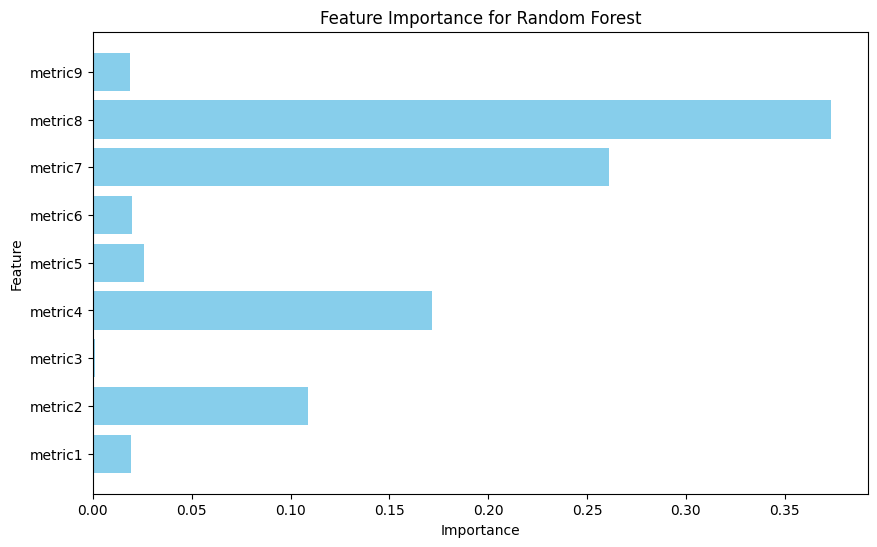

In [30]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate models
best_model = None
best_accuracy = 0
best_trained_model = None

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name
        best_trained_model = model

print(f"Best model: {best_model} with accuracy {best_accuracy:.2f}")

best_model_filename = "best_model.pkl"
joblib.dump(best_trained_model, best_model_filename)

# Feature importance analysis (only for tree-based models)
if best_model in ["Random Forest", "Gradient Boosting"]:
    feature_importances = best_trained_model.feature_importances_
    feature_names = X.columns
    
    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_importances, color='skyblue')
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title(f"Feature Importance for {best_model}")
    plt.show()